<H2> Gathering and Sorting Required Data

In [1]:
#Importing all the required libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

In [5]:
df = pd.read_excel('data/Main_dataset.xlsx')
df.rename(columns={'Income':'Average Income'},inplace = True)
df

Directions   Neighbourhoods  Longitude   Latitude  Population  \
0   South & East            Adyar  80.257779  13.006450        7034   
1   South & East          Alandur  80.171919  13.002822      642237   
2           West        Alapakkam  80.165435  13.049901        9404   
3           West  Alwarthirunagar  80.183669  13.047486        8876   
4           West         Ambattur  80.159862  13.112886      466205   
..           ...              ...        ...        ...         ...   
77  South & East        Velachery  80.222851  12.980165        5846   
78        North            Vepery  80.262274  13.084295      333445   
79        North       Villivakkam  80.208138  13.112588       41603   
80        North        Vyasarpadi  80.257124  13.116973       15013   
81  South & East    West Mambalam  80.227078  13.042732       39584   

    Average Income  
0            38236  
1            90526  
2            57569  
3            38509  
4            74366  
..             ...  
77           34048  
78           66196  
79           66778  
80           65688  
81           59312  

[82 rows x 6 columns]

In [9]:
Chennai_population_df = pd.DataFrame(df[['Directions','Neighbourhoods','Population']])
Chennai_population_df.to_excel('data/Chennai_population.xlsx')
Chennai_population_df.head()

Directions   Neighbourhoods  Population
0  South & East            Adyar        7034
1  South & East          Alandur      642237
2          West        Alapakkam        9404
3          West  Alwarthirunagar        8876
4          West         Ambattur      466205

In [10]:
Chennai_avg_income_df = pd.DataFrame(df[['Directions','Neighbourhoods','Average Income']])
Chennai_avg_income_df.to_excel('data/Chennai_avg_income.xlsx')
Chennai_avg_income_df.head()

Directions   Neighbourhoods  Average Income
0  South & East            Adyar           38236
1  South & East          Alandur           90526
2          West        Alapakkam           57569
3          West  Alwarthirunagar           38509
4          West         Ambattur           74366

In [11]:
Chennai_latitude = df['Latitude'].mean()
Chennai_longitude = df['Longitude'].mean()
print("Latitude and Longitude of Chennai are : ",Chennai_latitude,Chennai_longitude)

Latitude and Longitude of Chennai are :  13.030071853658534 80.21293211243129


In [12]:
CLIENT_ID = 'G0K2BLGBDE5OZHAQN2HVBKNHTLVJK1ENRVBIXSLXKL4O3ODS'
CLIENT_SECRET = 'I0ACFP0WSJRR13FKTPS4XAWOVNVPLNHFE0RPFUXC2RPT31BN'
VERSION = '20180606'
LIMIT = 150

In [13]:
directions_Chennai = df['Directions'].unique().tolist()
directions_Chennai

['South & East', 'West', 'North ']

In [17]:
directions_colors={}
for i in directions_Chennai:
    directions_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))

In [18]:
directions_colors

{'South & East': '#4850E4', 'West': '#EE7861', 'North ': '#0E8205'}

In [20]:
chennai_map = folium.Map(location=[Chennai_latitude,Chennai_longitude],zoom_start=12,control_scale=True)

In [23]:
for lat,lng,dirn,nei in zip(df['Latitude'],
                           df['Longitude'],
                           df['Directions'],
                           df['Neighbourhoods']):
    label_text = dirn + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=directions_colors[dirn],
    fill=True,
    fill_color = directions_colors[dirn],
    fill_opacity=0.7).add_to(chennai_map)

In [24]:
chennai_map

<H2> Using Foursquare API

In [25]:
def getNearbyVenues(names, dirn, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, dirn, lat, lng in zip(names, dirn, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            dirn,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Directions',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [33]:
chennai_venues = getNearbyVenues(names=df['Neighbourhoods'],latitudes=df['Latitude'],longitudes=df['Longitude'],dirn=df['Directions'])

Fetching venues for :  Adyar
Fetching venues for :  Alandur
Fetching venues for :  Alapakkam
Fetching venues for :  Alwarthirunagar
Fetching venues for :  Ambattur
Fetching venues for :  Aminjikarai
Fetching venues for :  Anna Nagar
Fetching venues for :  Arumbakkam
Fetching venues for :  Ashok Nagar
Fetching venues for :  Avadi
Fetching venues for :  Ayappakkam
Fetching venues for :  Besant Nagar
Fetching venues for :  Broadway
Fetching venues for :  Central
Fetching venues for :  Chetpet
Fetching venues for :  Choolai
Fetching venues for :  Egmore
Fetching venues for :  Ennore
Fetching venues for :  George Town
Fetching venues for :  Gopalapuram
Fetching venues for :  Guindy
Fetching venues for :  Injambakkam
Fetching venues for :  Irumbuliyur
Fetching venues for :  Iyyapanthangal
Fetching venues for :  Kathirvedu
Fetching venues for :  Kathivakkam
Fetching venues for :  Keelkattalai
Fetching venues for :  Kolathur
Fetching venues for :  Korattur
Fetching venues for :  Korukkupet
Fet

In [34]:
print("Total number of venues found in Chennai are : ",chennai_venues.shape[0])

Total number of venues found in Chennai are :  2939


In [35]:
chennai_venues.head(5)

Neighborhood    Directions  Neighborhood Latitude  Neighborhood Longitude  \
0        Adyar  South & East               13.00645               80.257779   
1        Adyar  South & East               13.00645               80.257779   
2        Adyar  South & East               13.00645               80.257779   
3        Adyar  South & East               13.00645               80.257779   
4        Adyar  South & East               13.00645               80.257779   

                   Venue  Venue Latitude  Venue Longitude  \
0       Bombay Brassiere       13.006961        80.256419   
1  Prems Graama Bhojanam       13.006345        80.253995   
2               Cool Biz       13.006632        80.257275   
3    Adyar Ananda Bhavan       13.005824        80.257368   
4      That Madras Place       13.005848        80.250726   

                  Venue Category  
0        North Indian Restaurant  
1  Vegetarian / Vegan Restaurant  
2                      Juice Bar  
3              Indian Restaurant  
4                           Café

In [36]:
chennai_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)

Venue Category
Indian Restaurant                460
Café                             139
Fast Food Restaurant             134
Hotel                            132
Pizza Place                      126
Ice Cream Shop                    92
Vegetarian / Vegan Restaurant     83
Clothing Store                    79
Chinese Restaurant                77
Sandwich Place                    72
Name: Neighborhood, dtype: int64

In [37]:
print("Total number of unique categories in chennai are : ",len(chennai_venues['Venue Category'].unique()))

Total number of unique categories in chennai are :  172


<H2> Total venues in each neighbourhood

In [41]:
each_chennai_venue_count = chennai_venues.groupby(['Directions','Neighborhood'])['Directions'].count().to_frame()
each_chennai_venue_count

Directions
Directions Neighborhood              
North      Avadi                    8
           Broadway                12
           Central                 40
           Choolai                 50
           Ennore                   5
...                               ...
West       Saligramam              52
           Thirumazhisai            7
           Vadapalani              68
           Valasaravakkam          34
           manapakkam              16

[80 rows x 1 columns]

In [45]:
each_chennai_venue_count.rename(columns={'Directions':'NumberOfVenues'},inplace=True)

In [57]:
each_chennai_venue_count.drop(['Neighborhood'],axis=1)

NumberOfVenues
Directions Neighborhood                  
North      Avadi                        8
           Broadway                    12
           Central                     40
           Choolai                     50
           Ennore                       5
...                                   ...
West       Saligramam                  52
           Thirumazhisai                7
           Vadapalani                  68
           Valasaravakkam              34
           manapakkam                  16

[80 rows x 1 columns]

<H2> Generating a Graph

[Text(0, 0, 'Avadi'),
 Text(0, 0, 'Broadway'),
 Text(0, 0, 'Central'),
 Text(0, 0, 'Choolai'),
 Text(0, 0, 'Ennore'),
 Text(0, 0, 'George Town'),
 Text(0, 0, 'Kathirvedu'),
 Text(0, 0, 'Kathivakkam'),
 Text(0, 0, 'Kolathur'),
 Text(0, 0, 'Korukkupet'),
 Text(0, 0, 'Park Town'),
 Text(0, 0, "Parry's Corner"),
 Text(0, 0, 'Perambur'),
 Text(0, 0, 'Red Hills'),
 Text(0, 0, 'Royapuram'),
 Text(0, 0, 'Sowcarpet'),
 Text(0, 0, 'Tiruvottiyur'),
 Text(0, 0, 'Tondiarpet'),
 Text(0, 0, 'Vallalar Nagar'),
 Text(0, 0, 'Vepery'),
 Text(0, 0, 'Villivakkam'),
 Text(0, 0, 'Vyasarpadi'),
 Text(0, 0, 'Adyar'),
 Text(0, 0, 'Alandur'),
 Text(0, 0, 'Besant Nagar'),
 Text(0, 0, 'Chetpet'),
 Text(0, 0, 'Egmore'),
 Text(0, 0, 'Gopalapuram'),
 Text(0, 0, 'Guindy'),
 Text(0, 0, 'Injambakkam'),
 Text(0, 0, 'Irumbuliyur'),
 Text(0, 0, 'Keelkattalai'),
 Text(0, 0, 'Kottivakkam'),
 Text(0, 0, 'Kovilambakkam'),
 Text(0, 0, 'Madipakkam'),
 Text(0, 0, 'Mambakkam'),
 Text(0, 0, 'Medavakkam'),
 Text(0, 0, 'Mylapore'),
 

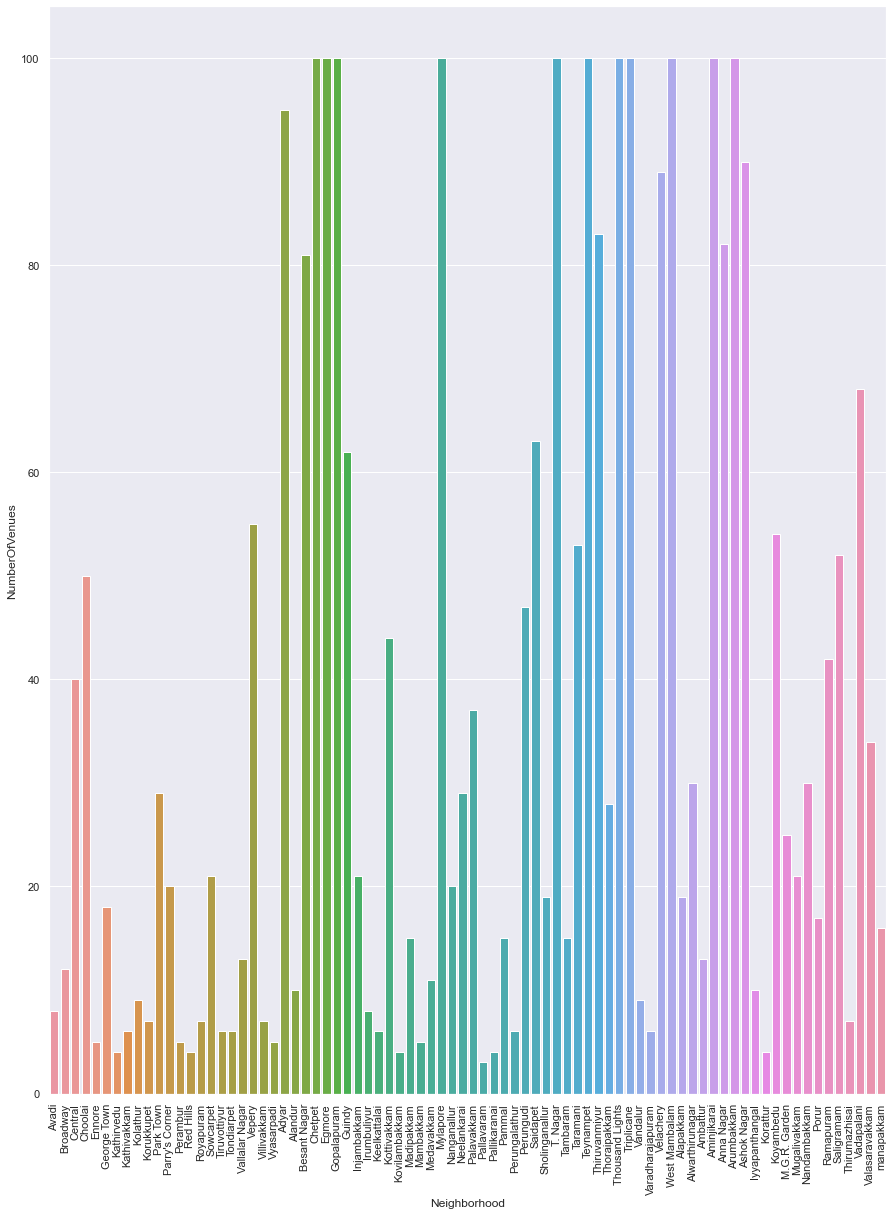

In [59]:
sns.set(rc={'figure.figsize':(15,20)})
plot = sns.barplot(x='Neighborhood',y='NumberOfVenues',data=each_chennai_venue_count)
plot.set_xticklabels(each_chennai_venue_count['Neighborhood'],rotation=90)

We can see that Chetpet, Egmore, Gopalapuram, Mylapore, T.Nagar, Teynampet,etc. have the more number of venues.

<H2> Finding nearest venues by providing a location

Let's take Mylapore for a test example

In [60]:
chennai_venues[chennai_venues['Neighborhood']=='Mylapore']

Neighborhood    Directions  Neighborhood Latitude  \
1385     Mylapore  South & East               13.03165   
1386     Mylapore  South & East               13.03165   
1387     Mylapore  South & East               13.03165   
1388     Mylapore  South & East               13.03165   
1389     Mylapore  South & East               13.03165   
...           ...           ...                    ...   
1480     Mylapore  South & East               13.03165   
1481     Mylapore  South & East               13.03165   
1482     Mylapore  South & East               13.03165   
1483     Mylapore  South & East               13.03165   
1484     Mylapore  South & East               13.03165   

      Neighborhood Longitude                                    Venue  \
1385               80.270099                 Kalathi Cool Drink Stall   
1386               80.270099                              Light House   
1387               80.270099                         The Leela Palace   
1388               80.270099                           Winners Bakery   
1389               80.270099                     Nilgiris Supermarket   
...                      ...                                      ...   
1480               80.270099                              GO GO Ramen   
1481               80.270099                                   Social   
1482               80.270099  The English Tearoom at The Faraway Tree   
1483               80.270099                                  Jamavar   
1484               80.270099                                  Barista   

      Venue Latitude  Venue Longitude       Venue Category  
1385       13.032062        80.270748            Juice Bar  
1386       13.039610        80.279474           Lighthouse  
1387       13.017246        80.273931                Hotel  
1388       13.034742        80.257085               Bakery  
1389       13.028484        80.256301     Department Store  
...              ...              ...                  ...  
1480       13.032675        80.252623  Japanese Restaurant  
1481       13.017425        80.270299            Gastropub  
1482       13.043223        80.256396             Tea Room  
1483       13.016994        80.273910    Indian Restaurant  
1484       13.042857        80.273860          Coffee Shop  

[100 rows x 8 columns]

<H3>Comparing different venues based on classifications

In [61]:
chennai_venues_comp = pd.get_dummies(chennai_venues[['Venue Category']])
chennai_venues_comp

Venue Category_ATM  Venue Category_Accessories Store  \
0                      0                                 0   
1                      0                                 0   
2                      0                                 0   
3                      0                                 0   
4                      0                                 0   
...                  ...                               ...   
2934                   0                                 0   
2935                   0                                 0   
2936                   0                                 0   
2937                   0                                 0   
2938                   0                                 0   

      Venue Category_Afghan Restaurant  Venue Category_African Restaurant  \
0                                    0                                  0   
1                                    0                                  0   
2                                    0                                  0   
3                                    0                                  0   
4                                    0                                  0   
...                                ...                                ...   
2934                                 0                                  0   
2935                                 0                                  0   
2936                                 0                                  0   
2937                                 0                                  0   
2938                                 0                                  0   

      Venue Category_Airport  Venue Category_Airport Lounge  \
0                          0                              0   
1                          0                              0   
2                          0                              0   
3                          0                              0   
4                          0                              0   
...                      ...                            ...   
2934                       0                              0   
2935                       0                              0   
2936                       0                              0   
2937                       0                              0   
2938                       0                              0   

      Venue Category_Airport Terminal  Venue Category_American Restaurant  \
0                                   0                                   0   
1                                   0                                   0   
2                                   0                                   0   
3                                   0                                   0   
4                                   0                                   0   
...                               ...                                 ...   
2934                                0                                   0   
2935                                0                                   0   
2936                                0                                   0   
2937                                0                                   0   
2938                                0                                   0   

      Venue Category_Andhra Restaurant  Venue Category_Arcade  ...  \
0                                    0                      0  ...   
1                                    0                      0  ...   
2                                    0                      0  ...   
3                                    0                      0  ...   
4                                    0                      0  ...   
...                                ...                    ...  ...   
2934                                 0                      0  ...   
2935                                 0                      0  ...   
2936                    

In [63]:
chennai_venues_comp['Neighborhood'] = chennai_venues['Neighborhood']
chennai_venues_grouped = chennai_venues_comp.groupby('Neighborhood').mean().reset_index()
chennai_venues_grouped

Neighborhood  Venue Category_ATM  Venue Category_Accessories Store  \
0             Adyar                 0.0                               0.0   
1           Alandur                 0.0                               0.0   
2         Alapakkam                 0.0                               0.0   
3   Alwarthirunagar                 0.0                               0.0   
4          Ambattur                 0.0                               0.0   
..              ...                 ...                               ...   
75           Vepery                 0.0                               0.0   
76      Villivakkam                 0.0                               0.0   
77       Vyasarpadi                 0.0                               0.0   
78    West Mambalam                 0.0                               0.0   
79       manapakkam                 0.0                               0.0   

    Venue Category_Afghan Restaurant  Venue Category_African Restaurant  \
0                                0.0                                0.0   
1                                0.0                                0.0   
2                                0.0                                0.0   
3                                0.0                                0.0   
4                                0.0                                0.0   
..                               ...                                ...   
75                               0.0                                0.0   
76                               0.0                                0.0   
77                               0.0                                0.0   
78                               0.0                                0.0   
79                               0.0                                0.0   

    Venue Category_Airport  Venue Category_Airport Lounge  \
0                      0.0                            0.0   
1                      0.0                            0.0   
2                      0.0                            0.0   
3                      0.0                            0.0   
4                      0.0                            0.0   
..                     ...                            ...   
75                     0.0                            0.0   
76                     0.0                            0.0   
77                     0.0                            0.0   
78                     0.0                            0.0   
79                     0.0                            0.0   

    Venue Category_Airport Terminal  Venue Category_American Restaurant  \
0                               0.0                                 0.0   
1                               0.0                                 0.0   
2                               0.0                                 0.0   
3                               0.0                                 0.0   
4                               0.0                                 0.0   
..                              ...                                 ...   
75                              0.0                                 0.0   
76                              0.0                                 0.0   
77                              0.0                                 0.0   
78                              0.0                                 0.0   
79                              0.0                                 0.0   

    Venue Category_Andhra Restaurant  ...  Venue Category_Toy / Game Store  \
0                             0.0000  ...                              0.0   
1                             0.0000  ...                              0.0   
2                             0.0000  ...                              0.0   
3                             0.0000  ...                              0.0   
4                             0.0000  ...                              0.0   
..                               ...  ...                              ...   
7

In [65]:
top_venues=5

for hood in chennai_venues_grouped ['Neighborhood']:
    print('---------',hood,'---------')
    temp = chennai_venues_grouped[chennai_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(top_venues))
    print('\n')

--------- Adyar ---------
                               Venue  Frequency
0   Venue Category_Indian Restaurant       0.17
1                Venue Category_Café       0.06
2         Venue Category_Pizza Place       0.06
3      Venue Category_Ice Cream Shop       0.06
4  Venue Category_Chinese Restaurant       0.05


--------- Alandur ---------
                              Venue  Frequency
0               Venue Category_Café        0.2
1              Venue Category_Hotel        0.2
2          Venue Category_Juice Bar        0.1
3     Venue Category_Breakfast Spot        0.1
4  Venue Category_Indian Restaurant        0.1


--------- Alapakkam ---------
                                          Venue  Frequency
0              Venue Category_Indian Restaurant       0.32
1  Venue Category_Vegetarian / Vegan Restaurant       0.11
2           Venue Category_Fast Food Restaurant       0.11
3               Venue Category_Asian Restaurant       0.11
4                    Venue Category_Pizza Place

                                 Venue  Frequency
0      Venue Category_Department Store       0.17
1           Venue Category_Pizza Place       0.17
2     Venue Category_Indian Restaurant       0.17
3           Venue Category_Coffee Shop       0.17
4  Venue Category_Fast Food Restaurant       0.17


--------- Kolathur ---------
                               Venue  Frequency
0       Venue Category_Train Station       0.22
1        Venue Category_Intersection       0.11
2          Venue Category_Smoke Shop       0.11
3  Venue Category_Light Rail Station       0.11
4    Venue Category_Asian Restaurant       0.11


--------- Korattur ---------
                               Venue  Frequency
0                Venue Category_Café       0.50
1  Venue Category_Miscellaneous Shop       0.25
2         Venue Category_Snack Place       0.25
3                 Venue Category_ATM       0.00
4               Venue Category_Motel       0.00


--------- Korukkupet ---------
                        Venue

                                 Venue  Frequency
0      Venue Category_Asian Restaurant       0.15
1     Venue Category_Indian Restaurant       0.15
2  Venue Category_Fast Food Restaurant       0.09
3           Venue Category_Pizza Place       0.09
4                  Venue Category_Café       0.09


--------- Vallalar Nagar ---------
                                 Venue  Frequency
0              Venue Category_Platform       0.31
1         Venue Category_Train Station       0.08
2     Venue Category_Convenience Store       0.08
3  Venue Category_Fast Food Restaurant       0.08
4            Venue Category_Restaurant       0.08


--------- Vandalur ---------
                                    Venue  Frequency
0             Venue Category_Intersection       0.11
1              Venue Category_Bus Station       0.11
2                      Venue Category_Zoo       0.11
3            Venue Category_Train Station       0.11
4  Venue Category_South Indian Restaurant       0.11


--------- Va

In [66]:
def return_most_common_venues(row, top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:top_venues]

In [67]:
top_venues2 = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(top_venues2):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = chennai_venues_grouped['Neighborhood']

for ind in np.arange(chennai_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chennai_venues_grouped.iloc[ind, :], top_venues2)

neighborhoods_venues_sorted.head()

Neighborhood                1st Most Common Venue  \
0            Adyar     Venue Category_Indian Restaurant   
1          Alandur                  Venue Category_Café   
2        Alapakkam     Venue Category_Indian Restaurant   
3  Alwarthirunagar  Venue Category_Fast Food Restaurant   
4         Ambattur           Venue Category_Pizza Place   

              2nd Most Common Venue                3rd Most Common Venue  \
0               Venue Category_Café           Venue Category_Pizza Place   
1              Venue Category_Hotel     Venue Category_Indian Restaurant   
2   Venue Category_Asian Restaurant  Venue Category_Fast Food Restaurant   
3  Venue Category_Indian Restaurant           Venue Category_Pizza Place   
4      Venue Category_Movie Theater           Venue Category_Bus Station   

                          4th Most Common Venue  \
0                 Venue Category_Ice Cream Shop   
1                  Venue Category_Metro Station   
2  Venue Category_Vegetarian / Vegan Restaurant   
3  Venue Category_Vegetarian / Vegan Restaurant   
4               Venue Category_Asian Restaurant   

               5th Most Common Venue            6th Most Common Venue  \
0  Venue Category_Chinese Restaurant       Venue Category_Coffee Shop   
1           Venue Category_Juice Bar             Venue Category_Trail   
2       Venue Category_Movie Theater    Venue Category_Sandwich Place   
3      Venue Category_Clothing Store              Venue Category_Café   
4   Venue Category_Indian Restaurant  Venue Category_Department Store   

           7th Most Common Venue                8th Most Common Venue  \
0    Venue Category_Dessert Shop                 Venue Category_Hotel   
1  Venue Category_Breakfast Spot  Venue Category_Fast Food Restaurant   
2          Venue Category_Bakery            Venue Category_Restaurant   
3  Venue Category_Sandwich Place      Venue Category_Asian Restaurant   
4  Venue Category_Clothing Store             Venue Category_Multiplex   

           9th Most Common Venue                  10th Most Common Venue  
0       Venue Category_Rock Club  Venue Category_North Indian Restaurant  
1     Venue Category_Zoo Exhibit               Venue Category_Food Truck  
2       Venue Category_Rest Area               Venue Category_Smoke Shop  
3       Venue Category_Bookstore        Venue Category_Convenience Store  
4  Venue Category_Ice Cream Shop            Venue Category_Train Station

In [68]:
neighborhoods_venues_sorted.shape

(80, 11)

<H2> K Value for clustering - Elbow Method

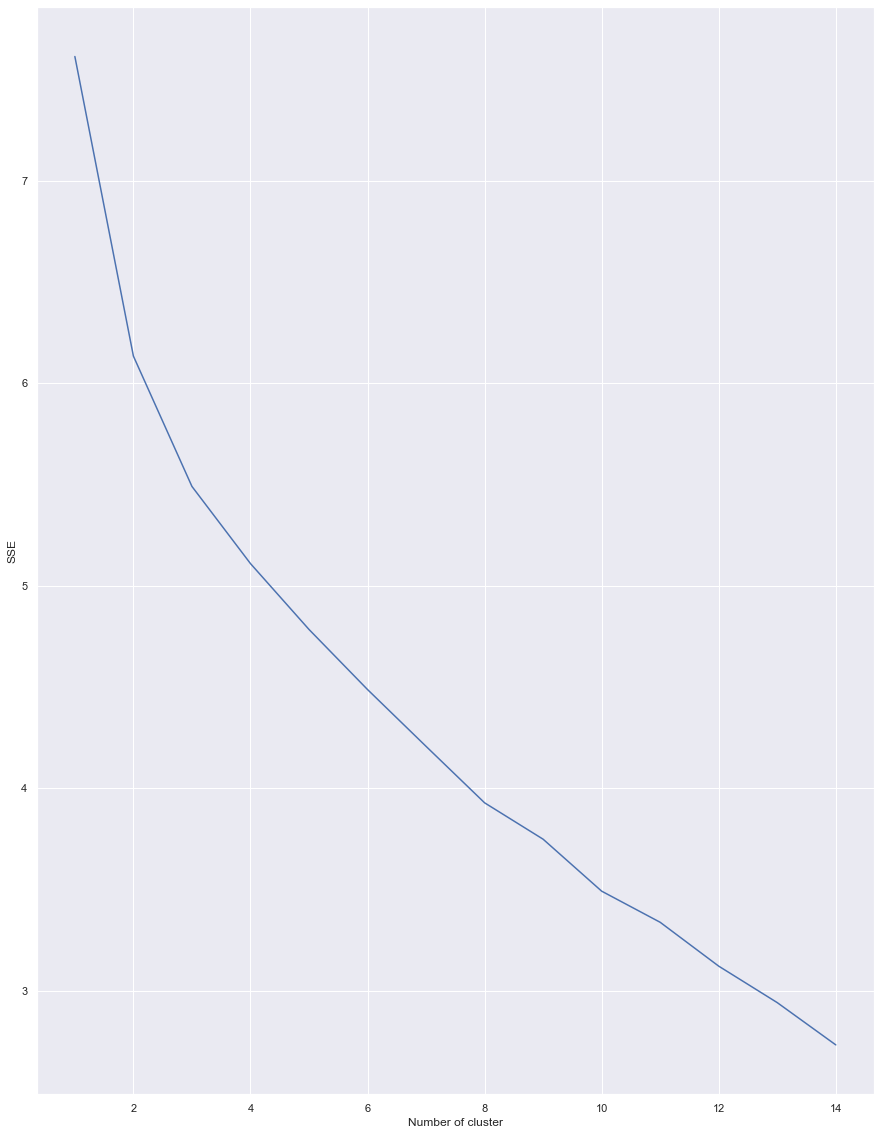

In [69]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(chennai_venues_grouped.drop('Neighborhood',axis=1))
    chennai_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

The optimal value for this cluster is 3

In [70]:
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(chennai_venues_grouped.drop('Neighborhood',axis=1))

KMeans(n_clusters=3, random_state=0)

In [71]:
chennai_venues_grouped['Cluster'] = kmeans.labels_
chennai_venues_grouped.groupby('Cluster')['Neighborhood'].count()

Cluster
0    14
1    42
2    24
Name: Neighborhood, dtype: int64

In [72]:
chennai_venues_grouped.columns

Index(['Neighborhood', 'Venue Category_ATM',
       'Venue Category_Accessories Store', 'Venue Category_Afghan Restaurant',
       'Venue Category_African Restaurant', 'Venue Category_Airport',
       'Venue Category_Airport Lounge', 'Venue Category_Airport Terminal',
       'Venue Category_American Restaurant',
       'Venue Category_Andhra Restaurant',
       ...
       'Venue Category_Trail', 'Venue Category_Train Station',
       'Venue Category_Travel & Transport',
       'Venue Category_Vegetarian / Vegan Restaurant',
       'Venue Category_Video Store', 'Venue Category_Whisky Bar',
       'Venue Category_Women's Store', 'Venue Category_Zoo',
       'Venue Category_Zoo Exhibit', 'Cluster'],
      dtype='object', length=174)

In [73]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(chennai_venues_grouped,on='Neighborhood')
neighborhoods_venues_sorted.head(4)

Neighborhood                1st Most Common Venue  \
0            Adyar     Venue Category_Indian Restaurant   
1          Alandur                  Venue Category_Café   
2        Alapakkam     Venue Category_Indian Restaurant   
3  Alwarthirunagar  Venue Category_Fast Food Restaurant   

              2nd Most Common Venue                3rd Most Common Venue  \
0               Venue Category_Café           Venue Category_Pizza Place   
1              Venue Category_Hotel     Venue Category_Indian Restaurant   
2   Venue Category_Asian Restaurant  Venue Category_Fast Food Restaurant   
3  Venue Category_Indian Restaurant           Venue Category_Pizza Place   

                          4th Most Common Venue  \
0                 Venue Category_Ice Cream Shop   
1                  Venue Category_Metro Station   
2  Venue Category_Vegetarian / Vegan Restaurant   
3  Venue Category_Vegetarian / Vegan Restaurant   

               5th Most Common Venue          6th Most Common Venue  \
0  Venue Category_Chinese Restaurant     Venue Category_Coffee Shop   
1           Venue Category_Juice Bar           Venue Category_Trail   
2       Venue Category_Movie Theater  Venue Category_Sandwich Place   
3      Venue Category_Clothing Store            Venue Category_Café   

           7th Most Common Venue                8th Most Common Venue  \
0    Venue Category_Dessert Shop                 Venue Category_Hotel   
1  Venue Category_Breakfast Spot  Venue Category_Fast Food Restaurant   
2          Venue Category_Bakery            Venue Category_Restaurant   
3  Venue Category_Sandwich Place      Venue Category_Asian Restaurant   

        9th Most Common Venue  ... Venue Category_Trail  \
0    Venue Category_Rock Club  ...                  0.0   
1  Venue Category_Zoo Exhibit  ...                  0.1   
2    Venue Category_Rest Area  ...                  0.0   
3    Venue Category_Bookstore  ...                  0.0   

   Venue Category_Train Station  Venue Category_Travel & Transport  \
0                           0.0                                0.0   
1                           0.0                                0.0   
2                           0.0                                0.0   
3                           0.0                                0.0   

   Venue Category_Vegetarian / Vegan Restaurant  Venue Category_Video Store  \
0                                      0.010526                         0.0   
1                                      0.000000                         0.0   
2                                      0.105263                         0.0   
3                                      0.066667                         0.0   

   Venue Category_Whisky Bar  Venue Category_Women's Store  \
0                        0.0                      0.010526   
1                        0.0                      0.000000   
2                        0.0                      0.000000   
3                        0.0                      0.000000   

   Venue Category_Zoo  Venue Category_Zoo Exhibit  Cluster  
0                 0.0                         0.0        1  
1                 0.0                         0.0        1  
2                 0.0                         0.0        2  
3                 0.0                         0.0        0  

[4 rows x 184 columns]

In [74]:
neighborhoods_venues_sorted.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(chennai_venues,on='Neighborhood')

<H3>Generating a map

In [75]:
# create map
map_clusters = folium.Map(location=[Chennai_latitude, Chennai_longitude], zoom_start=11)

In [76]:
#color 
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# markers
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [77]:
map_clusters

<H2> Suggestions based on user input

In [78]:
# factors like population and income will come in handy now
Chennai_avg_income_df.head()

Directions   Neighbourhoods  Average Income
0  South & East            Adyar           38236
1  South & East          Alandur           90526
2          West        Alapakkam           57569
3          West  Alwarthirunagar           38509
4          West         Ambattur           74366

In [118]:
Chennai_population_df.head()

Directions   Neighbourhoods  Population  Normalized_population
0  South & East            Adyar        7034               0.001222
1  South & East          Alandur      642237               0.111595
2          West        Alapakkam        9404               0.001634
3          West  Alwarthirunagar        8876               0.001542
4          West         Ambattur      466205               0.081007

In [80]:
Chennai_population_df['Normalized_population'] = Chennai_population_df['Population']/Chennai_population_df['Population'].max(axis=0)
Chennai_population_df.head()

Directions   Neighbourhoods  Population  Normalized_population
0  South & East            Adyar        7034               0.001222
1  South & East          Alandur      642237               0.111595
2          West        Alapakkam        9404               0.001634
3          West  Alwarthirunagar        8876               0.001542
4          West         Ambattur      466205               0.081007

In [82]:
Chennai_avg_income_df['Normalized_income'] = Chennai_avg_income_df['Average Income']/Chennai_avg_income_df['Average Income'].max(axis=0)
Chennai_avg_income_df.head()

Directions   Neighbourhoods  Average Income  Normalized_income
0  South & East            Adyar           38236           0.382823
1  South & East          Alandur           90526           0.906357
2          West        Alapakkam           57569           0.576387
3          West  Alwarthirunagar           38509           0.385557
4          West         Ambattur           74366           0.744561

In [83]:
chennai_venues_grouped.head()

Neighborhood  Venue Category_ATM  Venue Category_Accessories Store  \
0            Adyar                 0.0                               0.0   
1          Alandur                 0.0                               0.0   
2        Alapakkam                 0.0                               0.0   
3  Alwarthirunagar                 0.0                               0.0   
4         Ambattur                 0.0                               0.0   

   Venue Category_Afghan Restaurant  Venue Category_African Restaurant  \
0                               0.0                                0.0   
1                               0.0                                0.0   
2                               0.0                                0.0   
3                               0.0                                0.0   
4                               0.0                                0.0   

   Venue Category_Airport  Venue Category_Airport Lounge  \
0                     0.0                            0.0   
1                     0.0                            0.0   
2                     0.0                            0.0   
3                     0.0                            0.0   
4                     0.0                            0.0   

   Venue Category_Airport Terminal  Venue Category_American Restaurant  \
0                              0.0                                 0.0   
1                              0.0                                 0.0   
2                              0.0                                 0.0   
3                              0.0                                 0.0   
4                              0.0                                 0.0   

   Venue Category_Andhra Restaurant  ...  Venue Category_Trail  \
0                               0.0  ...                   0.0   
1                               0.0  ...                   0.1   
2                               0.0  ...                   0.0   
3                               0.0  ...                   0.0   
4                               0.0  ...                   0.0   

   Venue Category_Train Station  Venue Category_Travel & Transport  \
0                      0.000000                                0.0   
1                      0.000000                                0.0   
2                      0.000000                                0.0   
3                      0.000000                                0.0   
4                      0.076923                                0.0   

   Venue Category_Vegetarian / Vegan Restaurant  Venue Category_Video Store  \
0                                      0.010526                         0.0   
1                                      0.000000                         0.0   
2                                      0.105263                         0.0   
3                                      0.066667                         0.0   
4                                      0.000000                         0.0   

   Venue Category_Whisky Bar  Venue Category_Women's Store  \
0                        0.0                      0.010526   
1                        0.0                      0.000000   
2                        0.0                      0.000000   
3                        0.0                      0.000000   
4                        0.0                      0.000000   

   Venue Category_Zoo  Venue Category_Zoo Exhibit  Cluster  
0                 0.0                         0.0        1  
1                 0.0                         0.0        1  
2                 0.0                         0.0        2  
3                 0.0                         0.0        0  
4                 0.0                         0.0        0  

[5 rows x 174 columns]

In [84]:
chennai_veg = chennai_venues_comp.groupby(['Neighborhood']).sum().reset_index()
chennai_veg.head()

Neighborhood  Venue Category_ATM  Venue Category_Accessories Store  \
0            Adyar                   0                                 0   
1          Alandur                   0                                 0   
2        Alapakkam                   0                                 0   
3  Alwarthirunagar                   0                                 0   
4         Ambattur                   0                                 0   

   Venue Category_Afghan Restaurant  Venue Category_African Restaurant  \
0                                 0                                  0   
1                                 0                                  0   
2                                 0                                  0   
3                                 0                                  0   
4                                 0                                  0   

   Venue Category_Airport  Venue Category_Airport Lounge  \
0                       0                              0   
1                       0                              0   
2                       0                              0   
3                       0                              0   
4                       0                              0   

   Venue Category_Airport Terminal  Venue Category_American Restaurant  \
0                                0                                   0   
1                                0                                   0   
2                                0                                   0   
3                                0                                   0   
4                                0                                   0   

   Venue Category_Andhra Restaurant  ...  Venue Category_Toy / Game Store  \
0                                 0  ...                                0   
1                                 0  ...                                0   
2                                 0  ...                                0   
3                                 0  ...                                0   
4                                 0  ...                                0   

   Venue Category_Trail  Venue Category_Train Station  \
0                     0                             0   
1                     1                             0   
2                     0                             0   
3                     0                             0   
4                     0                             1   

   Venue Category_Travel & Transport  \
0                                  0   
1                                  0   
2                                  0   
3                                  0   
4                                  0   

   Venue Category_Vegetarian / Vegan Restaurant  Venue Category_Video Store  \
0                                             1                           0   
1                                             0                           0   
2                                             2                           0   
3                                             2                           0   
4                                             0                           0   

   Venue Category_Whisky Bar  Venue Category_Women's Store  \
0                          0                             1   
1                          0                             0   
2                          0                             0   
3                          0                             0   
4                          0                             0   

   Venue Category_Zoo  Venue Category_Zoo Exhibit  
0                   0                           0  
1                   0                           0  
2                   0                           0  
3                   0                           0  
4                   0                           0  

[5 rows x 173 columns]

In [85]:
chennai_veg['Venue Category_Vegetarian / Vegan Restaurant']

0     1
1     0
2     2
3     2
4     0
     ..
75    1
76    0
77    0
78    3
79    0
Name: Venue Category_Vegetarian / Vegan Restaurant, Length: 80, dtype: uint8

In [86]:
chennai_veg = chennai_veg[['Neighborhood','Venue Category_Vegetarian / Vegan Restaurant']]

In [87]:
chennai_veg.rename(columns={'Venue Category_Vegetarian / Vegan Restaurant':'NumberOfVegRestaurants'},inplace=True)
chennai_veg.head()

Neighborhood  NumberOfVegRestaurants
0            Adyar                       1
1          Alandur                       0
2        Alapakkam                       2
3  Alwarthirunagar                       2
4         Ambattur                       0

In [92]:
chennai_veg['NumberOfNonVeganrestaurants'] = 1-(chennai_veg['NumberOfVegRestaurants']/chennai_veg['NumberOfVegRestaurants'].max(axis=0))
chennai_veg.head(10)

Neighborhood  NumberOfVegRestaurants  NumberOfNonVeganrestaurants
0            Adyar                       1                     0.857143
1          Alandur                       0                     1.000000
2        Alapakkam                       2                     0.714286
3  Alwarthirunagar                       2                     0.714286
4         Ambattur                       0                     1.000000
5      Aminjikarai                       6                     0.142857
6       Anna Nagar                       4                     0.428571
7       Arumbakkam                       7                     0.000000
8      Ashok Nagar                       4                     0.428571
9            Avadi                       0                     1.000000

In [103]:
chennai_veg.rename(columns={'Neighborhood':'Neighbourhoods'},inplace=True)

<H3> Building a target neighborhood by providing a sample restaurant

Lets take Mylapore

In [94]:
target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='Mylapore']
target_cluster_dataframe.reset_index()

index Neighborhood             1st Most Common Venue  \
0    1369     Mylapore  Venue Category_Indian Restaurant   
1    1370     Mylapore  Venue Category_Indian Restaurant   
2    1371     Mylapore  Venue Category_Indian Restaurant   
3    1372     Mylapore  Venue Category_Indian Restaurant   
4    1373     Mylapore  Venue Category_Indian Restaurant   
..    ...          ...                               ...   
95   1464     Mylapore  Venue Category_Indian Restaurant   
96   1465     Mylapore  Venue Category_Indian Restaurant   
97   1466     Mylapore  Venue Category_Indian Restaurant   
98   1467     Mylapore  Venue Category_Indian Restaurant   
99   1468     Mylapore  Venue Category_Indian Restaurant   

        2nd Most Common Venue 3rd Most Common Venue  \
0   Venue Category_Restaurant  Venue Category_Hotel   
1   Venue Category_Restaurant  Venue Category_Hotel   
2   Venue Category_Restaurant  Venue Category_Hotel   
3   Venue Category_Restaurant  Venue Category_Hotel   
4   Venue Category_Restaurant  Venue Category_Hotel   
..                        ...                   ...   
95  Venue Category_Restaurant  Venue Category_Hotel   
96  Venue Category_Restaurant  Venue Category_Hotel   
97  Venue Category_Restaurant  Venue Category_Hotel   
98  Venue Category_Restaurant  Venue Category_Hotel   
99  Venue Category_Restaurant  Venue Category_Hotel   

                           4th Most Common Venue  \
0   Venue Category_Vegetarian / Vegan Restaurant   
1   Venue Category_Vegetarian / Vegan Restaurant   
2   Venue Category_Vegetarian / Vegan Restaurant   
3   Venue Category_Vegetarian / Vegan Restaurant   
4   Venue Category_Vegetarian / Vegan Restaurant   
..                                           ...   
95  Venue Category_Vegetarian / Vegan Restaurant   
96  Venue Category_Vegetarian / Vegan Restaurant   
97  Venue Category_Vegetarian / Vegan Restaurant   
98  Venue Category_Vegetarian / Vegan Restaurant   
99  Venue Category_Vegetarian / Vegan Restaurant   

                5th Most Common Venue 6th Most Common Venue  \
0   Venue Category_Chinese Restaurant   Venue Category_Café   
1   Venue Category_Chinese Restaurant   Venue Category_Café   
2   Venue Category_Chinese Restaurant   Venue Category_Café   
3   Venue Category_Chinese Restaurant   Venue Category_Café   
4   Venue Category_Chinese Restaurant   Venue Category_Café   
..                                ...                   ...   
95  Venue Category_Chinese Restaurant   Venue Category_Café   
96  Venue Category_Chinese Restaurant   Venue Category_Café   
97  Venue Category_Chinese Restaurant   Venue Category_Café   
98  Venue Category_Chinese Restaurant   Venue Category_Café   
99  Venue Category_Chinese Restaurant   Venue Category_Café   

          7th Most Common Venue          8th Most Common Venue  ...  \
0   Venue Category_Dessert Shop  Venue Category_Ice Cream Shop  ...   
1   Venue Category_Dessert Shop  Venue Category_Ice Cream Shop  ...   
2   Venue Category_Dessert Shop  Venue Category_Ice Cream Shop  ...   
3   Venue Category_Dessert Shop  Venue Category_Ice Cream Shop  ...   
4   Venue Category_Dessert Shop  Venue Category_Ice Cream Shop  ...   
..                          ...                            ...  ...   
95  Venue Category_Dessert Shop  Venue Category_Ice Cream Shop  ...   
96  Venue Category_Dessert Shop  Venue Category_Ice Cream Shop  ...   
97  Venue Category_Dessert Shop  Venue Category_Ice Cream Shop  ...   
98  Venue Category_Dessert Shop  Venue Category_Ice Cream Shop  ...   
99  Venue Category_Dessert Shop  Venue Category_Ice Cream Shop  ...   

   Venue Category_Zoo Venue Category_Zoo Exhibit  Cluster    Directions  \
0                 0.0                        0.0        1  South & East   
1                 0.0                        0.0        1  South & East   
2                 0.0                        0.0        1  South & East   
3                 0.0                        0.0        1  South & East   
4           

In [96]:
target_cluster = target_cluster_dataframe.iloc[0].at['Cluster']
print("The target cluster is : ",target_cluster)

The target cluster is :  1


In [97]:
possible_neighborhoods = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster']==target_cluster]
possible_neighborhoods.head()

Neighborhood             1st Most Common Venue 2nd Most Common Venue  \
0        Adyar  Venue Category_Indian Restaurant   Venue Category_Café   
1        Adyar  Venue Category_Indian Restaurant   Venue Category_Café   
2        Adyar  Venue Category_Indian Restaurant   Venue Category_Café   
3        Adyar  Venue Category_Indian Restaurant   Venue Category_Café   
4        Adyar  Venue Category_Indian Restaurant   Venue Category_Café   

        3rd Most Common Venue          4th Most Common Venue  \
0  Venue Category_Pizza Place  Venue Category_Ice Cream Shop   
1  Venue Category_Pizza Place  Venue Category_Ice Cream Shop   
2  Venue Category_Pizza Place  Venue Category_Ice Cream Shop   
3  Venue Category_Pizza Place  Venue Category_Ice Cream Shop   
4  Venue Category_Pizza Place  Venue Category_Ice Cream Shop   

               5th Most Common Venue       6th Most Common Venue  \
0  Venue Category_Chinese Restaurant  Venue Category_Coffee Shop   
1  Venue Category_Chinese Restaurant  Venue Category_Coffee Shop   
2  Venue Category_Chinese Restaurant  Venue Category_Coffee Shop   
3  Venue Category_Chinese Restaurant  Venue Category_Coffee Shop   
4  Venue Category_Chinese Restaurant  Venue Category_Coffee Shop   

         7th Most Common Venue 8th Most Common Venue  \
0  Venue Category_Dessert Shop  Venue Category_Hotel   
1  Venue Category_Dessert Shop  Venue Category_Hotel   
2  Venue Category_Dessert Shop  Venue Category_Hotel   
3  Venue Category_Dessert Shop  Venue Category_Hotel   
4  Venue Category_Dessert Shop  Venue Category_Hotel   

      9th Most Common Venue  ... Venue Category_Zoo  \
0  Venue Category_Rock Club  ...                0.0   
1  Venue Category_Rock Club  ...                0.0   
2  Venue Category_Rock Club  ...                0.0   
3  Venue Category_Rock Club  ...                0.0   
4  Venue Category_Rock Club  ...                0.0   

   Venue Category_Zoo Exhibit  Cluster    Directions  Neighborhood Latitude  \
0                         0.0        1  South & East               13.00645   
1                         0.0        1  South & East               13.00645   
2                         0.0        1  South & East               13.00645   
3                         0.0        1  South & East               13.00645   
4                         0.0        1  South & East               13.00645   

   Neighborhood Longitude                  Venue  Venue Latitude  \
0               80.257779       Bombay Brassiere       13.006961   
1               80.257779  Prems Graama Bhojanam       13.006345   
2               80.257779               Cool Biz       13.006632   
3               80.257779    Adyar Ananda Bhavan       13.005824   
4               80.257779      That Madras Place       13.005848   

   Venue Longitude                 Venue Category  
0        80.256419        North Indian Restaurant  
1        80.253995  Vegetarian / Vegan Restaurant  
2        80.257275                      Juice Bar  
3        80.257368              Indian Restaurant  
4        80.250726                           Café  

[5 rows x 191 columns]

In [98]:
print("There are {} neighborhoods which has similar characteristics to Mylapore.".format(possible_neighborhoods.shape[0]))

There are 2274 neighborhoods which has similar characteristics to Mylapore.


In [129]:
possible_neighborhoods.rename(columns={'Neighborhood':'Neighbourhoods'},inplace =True)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [130]:
possible_neighborhoods.reset_index().head()

index Neighbourhoods             1st Most Common Venue  \
0      0          Adyar  Venue Category_Indian Restaurant   
1      1          Adyar  Venue Category_Indian Restaurant   
2      2          Adyar  Venue Category_Indian Restaurant   
3      3          Adyar  Venue Category_Indian Restaurant   
4      4          Adyar  Venue Category_Indian Restaurant   

  2nd Most Common Venue       3rd Most Common Venue  \
0   Venue Category_Café  Venue Category_Pizza Place   
1   Venue Category_Café  Venue Category_Pizza Place   
2   Venue Category_Café  Venue Category_Pizza Place   
3   Venue Category_Café  Venue Category_Pizza Place   
4   Venue Category_Café  Venue Category_Pizza Place   

           4th Most Common Venue              5th Most Common Venue  \
0  Venue Category_Ice Cream Shop  Venue Category_Chinese Restaurant   
1  Venue Category_Ice Cream Shop  Venue Category_Chinese Restaurant   
2  Venue Category_Ice Cream Shop  Venue Category_Chinese Restaurant   
3  Venue Category_Ice Cream Shop  Venue Category_Chinese Restaurant   
4  Venue Category_Ice Cream Shop  Venue Category_Chinese Restaurant   

        6th Most Common Venue        7th Most Common Venue  \
0  Venue Category_Coffee Shop  Venue Category_Dessert Shop   
1  Venue Category_Coffee Shop  Venue Category_Dessert Shop   
2  Venue Category_Coffee Shop  Venue Category_Dessert Shop   
3  Venue Category_Coffee Shop  Venue Category_Dessert Shop   
4  Venue Category_Coffee Shop  Venue Category_Dessert Shop   

  8th Most Common Venue  ... Venue Category_Zoo Venue Category_Zoo Exhibit  \
0  Venue Category_Hotel  ...                0.0                        0.0   
1  Venue Category_Hotel  ...                0.0                        0.0   
2  Venue Category_Hotel  ...                0.0                        0.0   
3  Venue Category_Hotel  ...                0.0                        0.0   
4  Venue Category_Hotel  ...                0.0                        0.0   

   Cluster    Directions  Neighborhood Latitude  Neighborhood Longitude  \
0        1  South & East               13.00645               80.257779   
1        1  South & East               13.00645               80.257779   
2        1  South & East               13.00645               80.257779   
3        1  South & East               13.00645               80.257779   
4        1  South & East               13.00645               80.257779   

                   Venue  Venue Latitude  Venue Longitude  \
0       Bombay Brassiere       13.006961        80.256419   
1  Prems Graama Bhojanam       13.006345        80.253995   
2               Cool Biz       13.006632        80.257275   
3    Adyar Ananda Bhavan       13.005824        80.257368   
4      That Madras Place       13.005848        80.250726   

                  Venue Category  
0        North Indian Restaurant  
1  Vegetarian / Vegan Restaurant  
2                      Juice Bar  
3              Indian Restaurant  
4                           Café  

[5 rows x 192 columns]

In [110]:
chennai_veg.rename(columns={'Neighborhood':'Neighbourhoods'},inplace=True)

<H2> Lets rank the restaurants by providing income and population factors as well

In [133]:
possible_neighborhoods = possible_neighborhoods.merge(Chennai_population_df[['Neighbourhoods','Population','Normalized_population']],on='Neighbourhoods')
possible_neighborhoods = possible_neighborhoods.merge(Chennai_avg_income_df[['Neighbourhoods','Average Income','Normalized_income']],on='Neighbourhoods')
possible_neighborhoods = possible_neighborhoods.merge(chennai_veg[['Neighbourhoods','NumberOfVegRestaurants','NumberOfNonVeganrestaurants']],on='Neighbourhoods')

In [138]:
possible_neighborhoods.head()

Neighbourhoods             1st Most Common Venue 2nd Most Common Venue  \
0          Adyar  Venue Category_Indian Restaurant   Venue Category_Café   
1          Adyar  Venue Category_Indian Restaurant   Venue Category_Café   
2          Adyar  Venue Category_Indian Restaurant   Venue Category_Café   
3          Adyar  Venue Category_Indian Restaurant   Venue Category_Café   
4          Adyar  Venue Category_Indian Restaurant   Venue Category_Café   

        3rd Most Common Venue          4th Most Common Venue  \
0  Venue Category_Pizza Place  Venue Category_Ice Cream Shop   
1  Venue Category_Pizza Place  Venue Category_Ice Cream Shop   
2  Venue Category_Pizza Place  Venue Category_Ice Cream Shop   
3  Venue Category_Pizza Place  Venue Category_Ice Cream Shop   
4  Venue Category_Pizza Place  Venue Category_Ice Cream Shop   

               5th Most Common Venue       6th Most Common Venue  \
0  Venue Category_Chinese Restaurant  Venue Category_Coffee Shop   
1  Venue Category_Chinese Restaurant  Venue Category_Coffee Shop   
2  Venue Category_Chinese Restaurant  Venue Category_Coffee Shop   
3  Venue Category_Chinese Restaurant  Venue Category_Coffee Shop   
4  Venue Category_Chinese Restaurant  Venue Category_Coffee Shop   

         7th Most Common Venue 8th Most Common Venue  \
0  Venue Category_Dessert Shop  Venue Category_Hotel   
1  Venue Category_Dessert Shop  Venue Category_Hotel   
2  Venue Category_Dessert Shop  Venue Category_Hotel   
3  Venue Category_Dessert Shop  Venue Category_Hotel   
4  Venue Category_Dessert Shop  Venue Category_Hotel   

      9th Most Common Venue  ... Venue Longitude  \
0  Venue Category_Rock Club  ...       80.256419   
1  Venue Category_Rock Club  ...       80.253995   
2  Venue Category_Rock Club  ...       80.257275   
3  Venue Category_Rock Club  ...       80.257368   
4  Venue Category_Rock Club  ...       80.250726   

                  Venue Category  Population_x  Normalized_population_x  \
0        North Indian Restaurant          7034                 0.001222   
1  Vegetarian / Vegan Restaurant          7034                 0.001222   
2                      Juice Bar          7034                 0.001222   
3              Indian Restaurant          7034                 0.001222   
4                           Café          7034                 0.001222   

   Population_y  Normalized_population_y  Average Income  Normalized_income  \
0          7034                 0.001222           38236           0.382823   
1          7034                 0.001222           38236           0.382823   
2          7034                 0.001222           38236           0.382823   
3          7034                 0.001222           38236           0.382823   
4          7034                 0.001222           38236           0.382823   

   NumberOfVegRestaurants  NumberOfNonVeganrestaurants  
0                       1                     0.857143  
1                       1                     0.857143  
2                       1                     0.857143  
3                       1                     0.857143  
4                       1                     0.857143  

[5 rows x 199 columns]

In [144]:
possible_neighborhoods['Ranking'] = possible_neighborhoods['Normalized_population_x'] * 0.5 + possible_neighborhoods['Normalized_income'] * 0.35 + possible_neighborhoods['NumberOfNonVeganrestaurants'] * 0.1
recommended_neighborhoods = possible_neighborhoods.sort_values(by='Ranking',ascending=False)
recommended_neighborhoods.reset_index(inplace=True, drop=True)

In [145]:
recommended_neighborhoods.head()

Neighbourhoods 1st Most Common Venue 2nd Most Common Venue  \
0        Alandur   Venue Category_Café  Venue Category_Hotel   
1        Alandur   Venue Category_Café  Venue Category_Hotel   
2        Alandur   Venue Category_Café  Venue Category_Hotel   
3        Alandur   Venue Category_Café  Venue Category_Hotel   
4        Alandur   Venue Category_Café  Venue Category_Hotel   

              3rd Most Common Venue         4th Most Common Venue  \
0  Venue Category_Indian Restaurant  Venue Category_Metro Station   
1  Venue Category_Indian Restaurant  Venue Category_Metro Station   
2  Venue Category_Indian Restaurant  Venue Category_Metro Station   
3  Venue Category_Indian Restaurant  Venue Category_Metro Station   
4  Venue Category_Indian Restaurant  Venue Category_Metro Station   

      5th Most Common Venue 6th Most Common Venue  \
0  Venue Category_Juice Bar  Venue Category_Trail   
1  Venue Category_Juice Bar  Venue Category_Trail   
2  Venue Category_Juice Bar  Venue Category_Trail   
3  Venue Category_Juice Bar  Venue Category_Trail   
4  Venue Category_Juice Bar  Venue Category_Trail   

           7th Most Common Venue                8th Most Common Venue  \
0  Venue Category_Breakfast Spot  Venue Category_Fast Food Restaurant   
1  Venue Category_Breakfast Spot  Venue Category_Fast Food Restaurant   
2  Venue Category_Breakfast Spot  Venue Category_Fast Food Restaurant   
3  Venue Category_Breakfast Spot  Venue Category_Fast Food Restaurant   
4  Venue Category_Breakfast Spot  Venue Category_Fast Food Restaurant   

        9th Most Common Venue  ...        Venue Category  Population_x  \
0  Venue Category_Zoo Exhibit  ...                 Hotel        642237   
1  Venue Category_Zoo Exhibit  ...  Fast Food Restaurant        642237   
2  Venue Category_Zoo Exhibit  ...                  Café        642237   
3  Venue Category_Zoo Exhibit  ...                  Café        642237   
4  Venue Category_Zoo Exhibit  ...             Juice Bar        642237   

   Normalized_population_x  Population_y  Normalized_population_y  \
0                 0.111595        642237                 0.111595   
1                 0.111595        642237                 0.111595   
2                 0.111595        642237                 0.111595   
3                 0.111595        642237                 0.111595   
4                 0.111595        642237                 0.111595   

   Average Income  Normalized_income  NumberOfVegRestaurants  \
0           90526           0.906357                       0   
1           90526           0.906357                       0   
2           90526           0.906357                       0   
3           90526           0.906357                       0   
4           90526           0.906357                       0   

   NumberOfNonVeganrestaurants   Ranking  
0                          1.0  0.473022  
1                          1.0  0.473022  
2                          1.0  0.473022  
3                          1.0  0.473022  
4                          1.0  0.473022  

[5 rows x 200 columns]

In [146]:
top3 = recommended_neighborhoods.groupby(['Neighbourhoods','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])['Ranking'].unique()

In [147]:
top3_df = pd.DataFrame(top3).reset_index()
top3_df.head(3)

Neighbourhoods             1st Most Common Venue  \
0          Adyar  Venue Category_Indian Restaurant   
1        Alandur               Venue Category_Café   
2    Aminjikarai  Venue Category_Indian Restaurant   

                 2nd Most Common Venue  \
0                  Venue Category_Café   
1                 Venue Category_Hotel   
2  Venue Category_Fast Food Restaurant   

                          3rd Most Common Venue               Ranking  
0                    Venue Category_Pizza Place   [0.220313523084876]  
1              Venue Category_Indian Restaurant  [0.4730221934446657]  
2  Venue Category_Vegetarian / Vegan Restaurant  [0.2952657933829124]

<H3> The above results are the top 3 similar restuarants to Mylapore Restaurant's Food.
    Our model recommends to visit these 3 restaurants.